In [1]:
!pip install langgraph langsmith langchain langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 14.1 MB/s eta 0:00:00


In [3]:
from typing import Annotated
from typing_extensions import TypedDict
!pip install Arxiv Wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.2 MB/s eta 0:00:00
  Created wheel for Wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=5bc256c99f181058612915aae9c88edccb53a9df089a5cd190aedba87fd76d43
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=e0c0273153fc9c7484b5b37e154ddd3545e17c1bf4d040422480195472d11621
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built Wikipedia sgmllib3k


In [5]:
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

arxiv_wrapper=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=300)
arxiv_tool=ArxivQueryRun(api_wrapper=arxiv_wrapper)

api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=300)
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [7]:
wiki_tool.invoke("Who is ShahRukh Khan?")

'Page: Shah Rukh Khan filmography\nSummary: Shah Rukh Khan is an Indian actor, producer and television personality who works in Hindi films. He began his acting career by playing a soldier in the Doordarshan series Fauji (1988), a role that garnered him recognition and led to starring roles in more te'

In [8]:
arxiv_tool.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with "

In [9]:
from langgraph.graph.message import add_messages
class State(TypedDict):
  messages:Annotated[list,add_messages]

In [10]:
from langgraph.graph import StateGraph,START,END

In [11]:
graph_builder=StateGraph(State)

In [12]:
from langchain_groq import ChatGroq

In [13]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')


In [14]:
llm=ChatGroq(groq_api_key=groq_api_key,model="Gemma2-9b-It")

llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78e97f93c750>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78e97faf3a50>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [19]:
tools=[wiki_tool,arxiv_tool]

In [15]:
llm.bind_tools([arxiv_tool,wiki_tool])

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78e97f93c750>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78e97faf3a50>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'arxiv', 'description': 'A wrapper around Arxiv.org Useful for when you need to answer questions about Physics, Mathematics, Computer Science, Quantitative Biology, Quantitative Finance, Statistics, Electrical Engineering, and Economics from scientific articles on arxiv.org. Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'search query to look up', 'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'wikipedia', 'description': 'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historica

In [16]:
def chatbot(state:State):
  return {"messages":[llm.invoke(state["messages"])]}

In [17]:
from langgraph.prebuilt import ToolNode,tools_condition

In [21]:
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START,"chatbot")
tool_node=ToolNode(tools=tools)
graph_builder.add_node("tools",tool_node)
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)
graph_builder.add_edge("tools","chatbot")
graph_builder.add_edge("chatbot",END)

In [22]:
graph=graph_builder.compile()

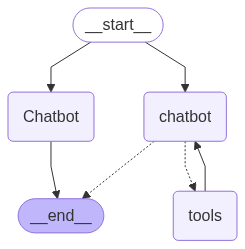

In [23]:
from IPython.display import display,Markdown,Image

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [24]:
user_input="Hi my name is varun"

events=graph.stream(
    {"messages":[("user",user_input)]},stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi my name is varun
================================== Ai Message ==================================

Hi Varun, it's nice to meet you!

What can I do for you today? 😊
